# import some important libraries  
numpy ,pandas ,matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

# Read and show the Data

In [2]:
data=pd.read_csv("Multivariate linear regression.csv")
df=pd.DataFrame(data)
print (df.to_string())

    house_size  room_number     price
0       2104.0          3.0  399900.0
1       1600.0          3.0  329900.0
2       2400.0          3.0  369000.0
3       1416.0          2.0  232000.0
4       3000.0          4.0  539900.0
5       1985.0          4.0  299900.0
6       1534.0          3.0  314900.0
7       1427.0          3.0  198999.0
8       1380.0          3.0  212000.0
9       1494.0          3.0  242500.0
10      1940.0          4.0  239999.0
11      2000.0          3.0  347000.0
12      1890.0          3.0  329999.0
13      4478.0          5.0  699900.0
14      1268.0          3.0  259900.0
15      2300.0          4.0  449900.0
16      1320.0          2.0  299900.0
17      1236.0          3.0  199900.0
18      2609.0          4.0  499998.0
19      3031.0          4.0  599000.0
20      1767.0          3.0  252900.0
21      1888.0          2.0  255000.0
22      1604.0          3.0  242900.0
23      1962.0          4.0  259900.0
24      3890.0          3.0  573900.0
25      1100

# Data Representation
Scatter plot show the relation between the number of the restaurant's customers and the profit of the restaurant.

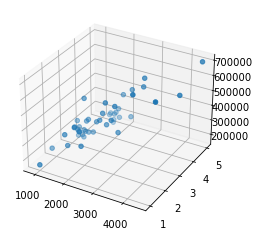

In [3]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['house_size'],df['room_number'],df["price"], 'gray')

In [4]:
# #Split population and profit into x and y

x = data.iloc[:, 0:2]
y = data.iloc[:, 2]

## number of training examples
m = len(y)
X_df = pd.DataFrame(x) #create dataframe for x(features)
y_df = pd.DataFrame(y) #create dataframe for y(target)


In [5]:
# Assign iteration number and  alpha and add a columns of 1s as intercept to X(2D)
iterations = 50000
alpha = 0.0000001
X_df['intercept'] = 1 # Add a columns of 1s as intercept to X

In [6]:
## Transform to Numpy arrays for easier matrix math and start theta at 0
x = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0, 0])


# Create computeCost function
 function called computeCost(x, y, theta)    which return the cost of given thetas (j(Θ))
 <img src="cost.png">

In [7]:
def computeCost(x, y, theta):
    
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((x.dot(theta)-y)**2)/2/m

    return J

In [8]:
#computeCost at initial theta (zeros) 
computeCost(x, y, theta)

65591548106.45744

# Create gradient_descent function
function called gradient_descent(x, y, theta) which  return the thetas of the final fitting after irretrations ,cost history and thetas history
 <img src="1_GD.png">

In [9]:
def gradient_descent(x, y, theta, alpha, iterations):
  
    J_history = [0] * iterations             #list for keep track of each cost update in a variable called J_history
    theta_history = [0] * iterations         # keep track of the theta values in each irretration

    ## number of training examples
    m = len(y)
    
    for i in range(iterations):
        
        yhat = x.dot(theta)
        loss = yhat-y
        gradient = np.transpose(x).dot(loss)/m
        theta = theta - alpha*gradient
        
        theta_history[i] = theta   
        cost = computeCost(x, y, theta)
        J_history[i] = cost  
          
    return theta, J_history, theta_history
     

# Iterations DataFrame
keep track of the thetas and the output cost


In [10]:
(thetas, J_history, theta_history) =gradient_descent(x,y,theta,alpha, iterations)


# Plot the cost in each iteration (J_history)

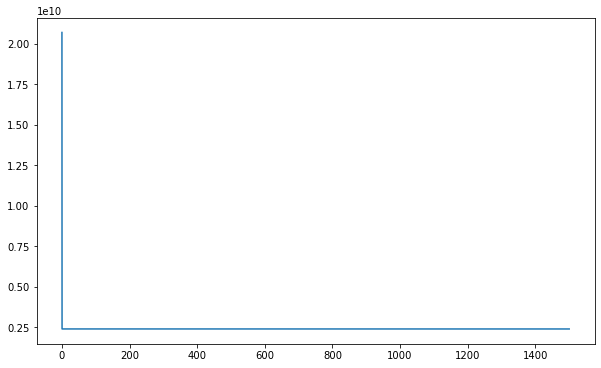

In [11]:
plt.figure(figsize=(10,6))
n=np.linspace(0,1500,50000)
plt.plot(n,J_history)

# Represent the iteration thetas and cost

In [12]:
t=pd.DataFrame(theta_history)
j=pd.DataFrame(J_history)
t.columns = ['Θ1', 'Θ2','Θ0']
j.columns = ['cost']
df_row = pd.concat([t, j], axis=1)
#print(df_row.to_string())

In [13]:
X_df=X_df.drop(["intercept"], axis=1)

# Prediction

In [14]:
#y=Θ1*x1+Θ1*x2+Θ0*1

print("price of house with 1416 size and 2 rooms =",int(np.array([ 1416, 2 ,1]).dot(thetas)))

price of house with 1416 size and 2 rooms = 234197
